![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Cleaning numerical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in `files_for_lab` folder.

## Context

An auto insurance company has collected some data about its customers including their _demographics_, _education_, _employment_, _policy details_, _vehicle information_ on which insurance policy is, and _claim amounts_. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

**Some business Objectives**:

- Retain customers,
- Analyze relevant customer data,
- Develop focused customer retention programs.

Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

## Instructions

### 1. Import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from functions import lowercase_cols

### 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [2]:
customer_df = pd.read_csv("files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")

### 3. First look at its main features (head, shape, info).

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

### 4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [6]:
customer_df = lowercase_cols(customer_df)
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [7]:
customer_df.rename(columns = {"employmentstatus":"employment_status"}, inplace = True)
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

### 5. Change effective to date column to datetime format.

In [8]:
customer_df["effective_to_date"] = pd.to_datetime(customer_df["effective_to_date"])
customer_df["effective_to_date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9134 entries, 0 to 9133
Series name: effective_to_date
Non-Null Count  Dtype         
--------------  -----         
9134 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 71.5 KB


### 6. Define a function that differentiates between continuous and discrete variables.

Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [9]:
# Let's check how many unique values each numeric column has

for col in customer_df.select_dtypes(np.number):
    print(col, "-", customer_df[col].nunique())

customer_lifetime_value - 8041
income - 5694
monthly_premium_auto - 202
months_since_last_claim - 36
months_since_policy_inception - 100
number_of_open_complaints - 6
number_of_policies - 9
total_claim_amount - 5106


Looks like there are 3 pretty clear continuous data columns with more than 5000 different values.

We can use this threshold in our function below, but we could set a lower threshold just in case.

Or just define an inputable threshold in our function, for example:

In [10]:
len(customer_df)*0.1

913.4000000000001

In [11]:
def continuous_vs_discrete(df, threshold = 0.1):
    
    df2 = df.select_dtypes(np.number)
    df3 = df.select_dtypes(np.number)
    
    df2 = df2.loc[:,df2.nunique()>=len(df)*threshold]
    df3 = df3.loc[:,df3.nunique()<len(df)*threshold]
        
    return df2, df3

customer_continuous, customer_discrete = continuous_vs_discrete(customer_df)              

In [12]:
customer_continuous

,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879
...,...,...,...
9129,23405.987980,71941,198.234764
9130,3096.511217,21604,379.200000
9131,8163.890428,0,790.784983
9132,7524.442436,21941,691.200000


In [13]:
customer_discrete

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,69,32,5,0,1
1,94,13,42,0,8
2,108,18,38,0,2
3,106,18,65,0,7
4,73,12,44,0,1
...,...,...,...,...,...
9129,73,18,89,0,2
9130,79,14,28,0,1
9131,85,9,37,3,2
9132,96,34,3,0,3


### 7. Plot a correlation matrix, comment what you see.

<AxesSubplot:>

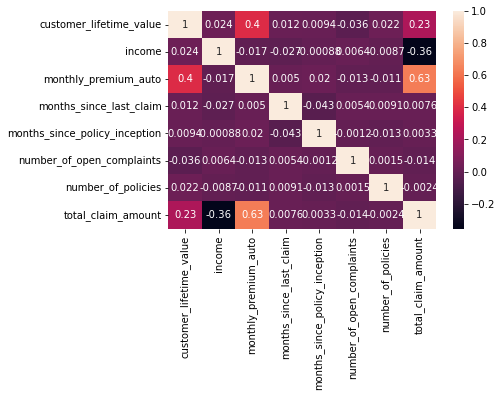

In [14]:
sns.heatmap(customer_df.corr(), annot = True)

Overall there is no correlation between columns, only destacable one is a 0.63 correlation betweel columns `monthly_premium_auto` and `total_claim_amount`.

There are also 3 more correlation higher than the average, which are:
- `customer_lifetime_value` - `monthly_premium auto`
- `customer_lifetime_value` - `total_claim_amount`
- `income` - `total_claim_amount`

### 8.1 Create a function to plot every discrete variable.

In [15]:
def hist_maker(df):
    '''Returns histplots in a single fig for each column of a given DataFrame
    
    Input: DataFrame
    Output: Histplots of all the columns'''
    
    cols = list(df.columns)
    x = len(cols)
    fig, ax = plt.subplots(1,x, figsize=(20,10))

    for col in cols:
        y = cols.index(col)
        sns.histplot(data=df, x=col, ax = ax[y])
        ax[y].set_title(col)
        
    return

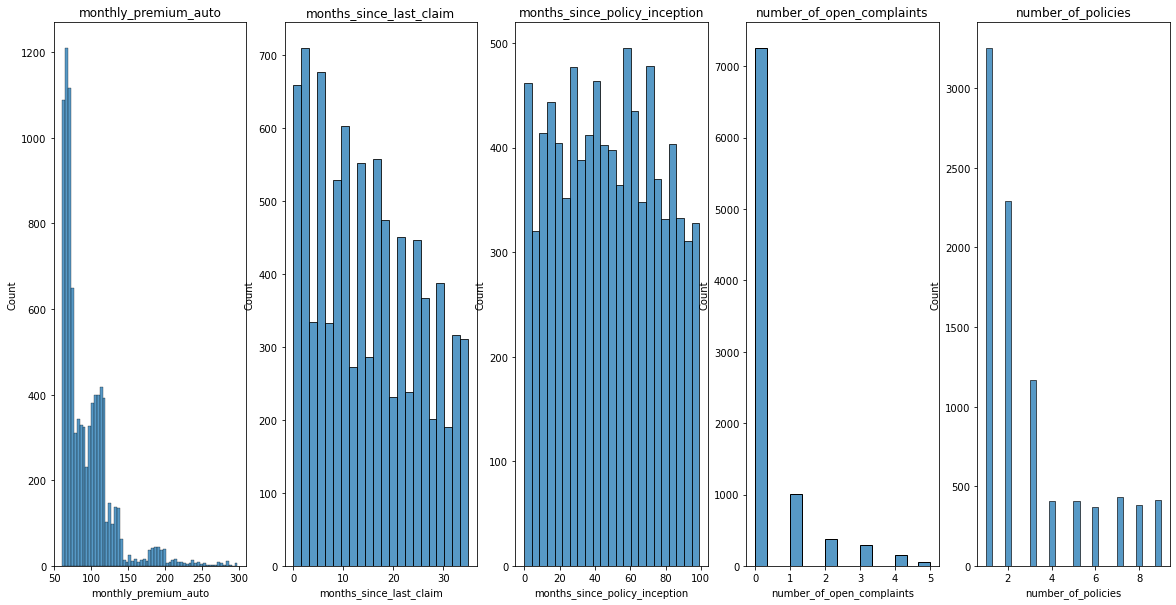

In [16]:
hist_maker(customer_discrete)

### 8.2 Do the same with the continuous variables

(Be Careful, you may need to change the plot type to one better suited for continuous data!)

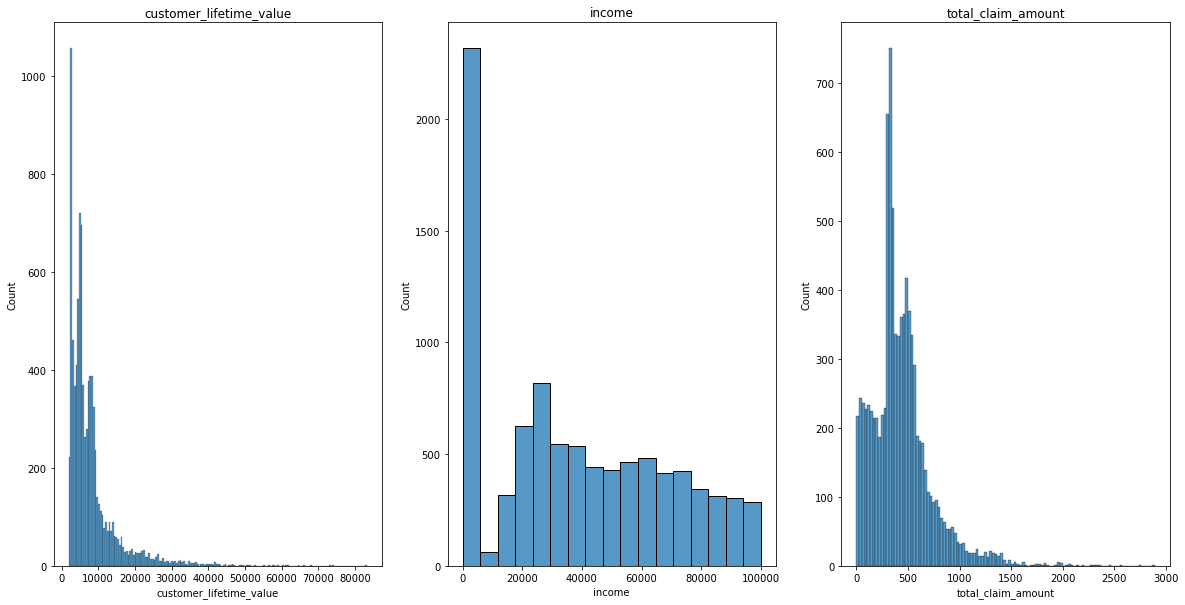

In [17]:
hist_maker(customer_continuous)

In [18]:
def box_maker(df):
    '''Returns boxplots in a single fig for each column of a given DataFrame
    
    Input: DataFrame
    Output: Boxplot of all the columns'''
	
    cols = list(df.columns)
    x = len(cols)
    fig, ax = plt.subplots(1,x, figsize=(20,10))
    
    for col in cols:
        y = cols.index(col)
        sns.boxplot(data=df, y=col, ax = ax[y])
        ax[y].set_title(col)
        
    return

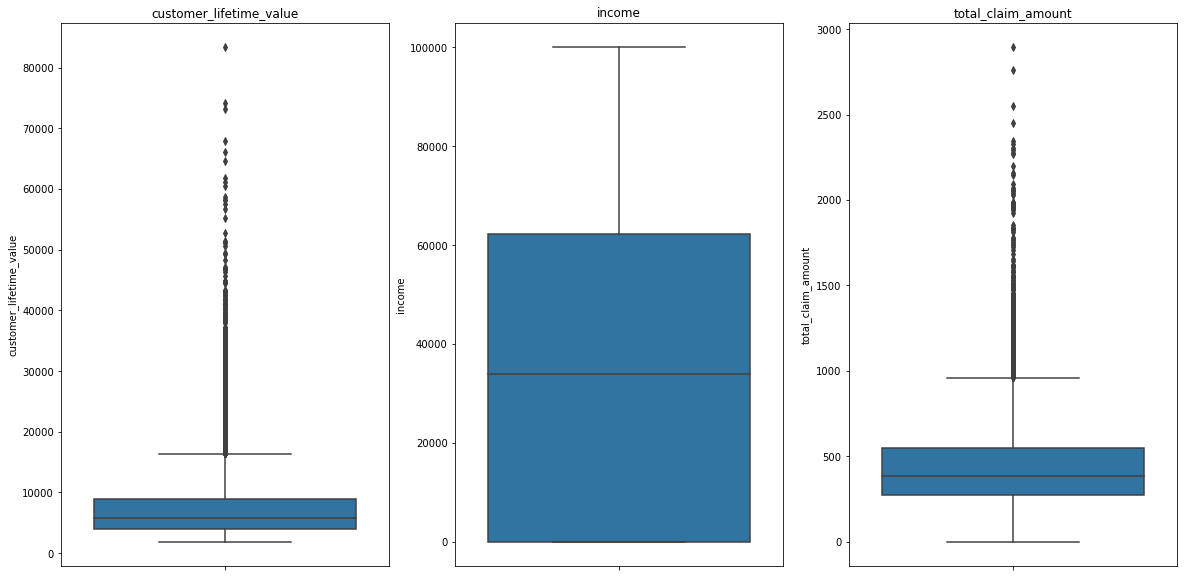

In [19]:
box_maker(customer_continuous)

### 9. Comment what you can see in the plots.

Data appears to be right skewed on both discrete and continuous columns.

No outliers in the `income` column.

Balanced data in the `months_since_policy_inception`.

### 10. Look for outliers in the continuous variables.

(HINT: There’s a good plot to do that!)

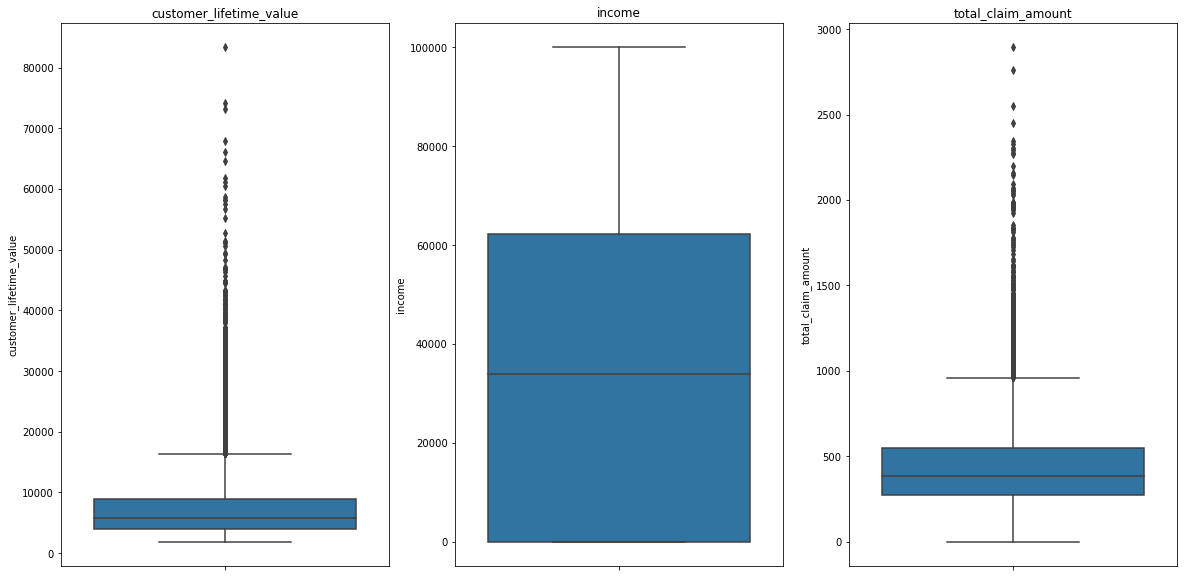

In [20]:
box_maker(customer_continuous)

### 11. Did you find outliers?  Comment what you will do with them.

There are outliers in both the `customer_lifetime_value` and `total_claim¨_amount`

We can drop them using the iqr.

In [21]:
iqr_clv = np.nanpercentile(customer_continuous["customer_lifetime_value"], 75) - np.nanpercentile(customer_continuous["customer_lifetime_value"], 25)
upper_limit_clv = np.nanpercentile(customer_continuous["customer_lifetime_value"], 75) + (1.5 * iqr_clv)
print(upper_limit_clv)

len(customer_continuous[customer_continuous["customer_lifetime_value"] > upper_limit_clv])

16414.039911750002


817

In [22]:
iqr_tca = np.nanpercentile(customer_continuous["total_claim_amount"], 75) - np.nanpercentile(customer_continuous["total_claim_amount"], 25)
upper_limit_tca = np.nanpercentile(customer_continuous["total_claim_amount"], 75) + (1.5 * iqr_tca)
print(upper_limit_tca)

len(customer_continuous[customer_continuous["total_claim_amount"] > upper_limit_tca])

960.3997301249999


453

In [23]:
customer_df = customer_df[customer_df["customer_lifetime_value"] < upper_limit_clv]
customer_df = customer_df[customer_df["total_claim_amount"] < upper_limit_tca]

customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,2011-01-25,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,YM19146,California,4100.398533,No,Premium,College,2011-01-06,Employed,F,47761,...,58,0,1,Personal Auto,Personal L2,Offer1,Branch,541.282007,Four-Door Car,Large
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


### 12. Check all columns for NaN values.

Decide what (if anything) you will need to do with them.

In [24]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

There are no NAs.

In [25]:
customer_df.to_csv("customer.csv")